<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%203.%20%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%20%D0%B2%D0%B8%D0%B4%D0%B0%20ARIMA/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Лекция: Определение параметров $p$, $d$, $q$ модели ARIMA с использованием ACF и PACF

Модели ARIMA ($p, d, q$) используются для анализа временных рядов. Важно правильно определить параметры этой модели, чтобы она могла эффективно описывать зависимость в данных. В данной лекции мы подробно рассмотрим, как использовать автокорреляционную функцию (ACF) и частную автокорреляционную функцию (PACF) для определения параметров $p$, $d$, и $q$, а также объясним, как вычисляются доверительные интервалы и как эти методы можно применить в Python.



## 1. Основы статистики для анализа временных рядов

### 1.1. Доверительные интервалы

Доверительный интервал (Confidence Interval, CI) — это диапазон, в который, с заданной вероятностью, попадает истинное значение какого-либо параметра. В контексте анализа временных рядов, например, для определения значимости автокорреляции, мы используем доверительные интервалы для того, чтобы понять, насколько сильно значения автокорреляции отличаются от случайных колебаний.

Когда мы работаем с временным рядом, значение автокорреляции на лаге $k$ обычно оценивается с помощью стандартной ошибки. Для 95% доверительного интервала значение автокорреляции считается значимым, если оно выходит за пределы определенного интервала.

#### Как вычислить доверительный интервал для ACF?

Для 95% доверительного интервала для автокорреляции используется следующее приближенное значение:

$$
CI = \pm \frac{1.96}{\sqrt{N}}
$$

где:
- $N$ — длина временного ряда,
- $1.96$ — квантиль стандартного нормального распределения для 95% уровня доверия.

Пример: если длина ряда $N = 100$, то доверительный интервал для значений ACF будет равен:

$$
CI = \pm \frac{1.96}{\sqrt{100}} = \pm 0.196
$$

Это означает, что любые значения ACF, выходящие за

пределы $[-0.196, 0.196]$, будут считаться значимыми, то есть указывать на наличие зависимости в данных. Если значения ACF остаются в этом интервале, то это может означать, что данные не имеют автокорреляции на данном лаге.



## 2. Определение параметров модели ARIMA

Модель ARIMA состоит из трёх параметров:
- $p$ — порядок авторегрессии (AR),
- $d$ — порядок дифференцирования (для стационарности ряда),
- $q$ — порядок скользящего среднего (MA).

Давайте подробнее разберем, как определить каждый из этих параметров.



### 2.1. Порядок $d$ — Дифференцирование

Для того чтобы применить модель ARIMA, временной ряд должен быть стационарным, что означает, что его статистические характеристики, такие как среднее и дисперсия, не зависят от времени.

**Как проверить стационарность?**

1. **Графический анализ:** Построение графика временного ряда. Если на графике наблюдается явный тренд или изменения дисперсии, это может указывать на нестационарность.
   
2. **Тест Дики-Фуллера (ADF):** Это статистический тест, который проверяет гипотезу $H_0$ о том, что ряд нестационарен. Если $p$-значение теста меньше 0.05, то гипотеза $H_0$ отвергается, и ряд считается стационарным.

**Что делать, если ряд нестационарен?**
- Применяйте дифференцирование. Дифференцирование ряда помогает избавиться от тренда и сделать его стационарным. Например, если первый порядок дифференцирования $d = 1$ не приводит к стационарности, можно применить дифференцирование второго порядка ($d = 2$).

**Пример с Python:**

```python
from statsmodels.tsa.stattools import adfuller

# Пример временного ряда
Y_t = [5, 7, 9, 11, 13, 15]  # Нестационарный ряд с трендом

# Тест на стационарность
result = adfuller(Y_t)
print(f"p-value: {result[1]}")  # Если p-value < 0.05, ряд стационарен
```



### 2.2. Порядок $q$ — Скользящее Среднее (MA)

Компонент скользящего среднего (MA) отвечает за влияние ошибок в прошлом на текущие значения ряда. Порядок $q$ определяет, сколько предыдущих значений ошибок следует учитывать.

**Как определить порядок $q$ с помощью ACF?**
1. Строим график автокорреляции (ACF) для временного ряда.
2. Значения ACF на лаге $k$ считаются значимыми, если они выходят за пределы доверительного интервала $[-CI, CI]$.
3. Порядок $q$ определяется по последнему значимому пику в ACF.

**Пример:**
Для ряда:
$$
Y_t = [4, 2, 3, 1, 2, 0, 1, -1]
$$

График ACF показывает:
| Лаг ($k$) | Значение ACF ($\rho_k$) | Значимость |
|-|||
| 0           | 1.0000                    | Всегда значимо |
| 1           | 0.65                      | Значимо |
| 2           | 0.25                      | Значимо |
| 3           | 0.05                      | Незначимо |

- Значимые пики на лагах 1 и 2 указывают, что $q = 2$, поскольку после второго лага значения становятся незначимыми.

**График ACF в Python:**

```python
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Построение графика ACF
plot_acf(Y_t, lags=10)
plt.title("График ACF")
plt.show()
```



### 2.3. Порядок $p$ — Авторегрессия (AR)

Компонент авторегрессии (AR) описывает зависимость текущего значения от предыдущих значений временного ряда.

**Как определить порядок $p$ с помощью PACF?**
1. Строим график частной автокорреляции (PACF).
2. Значимые пики на графике PACF указывают на количество лагов, которые нужно учитывать в модели AR.

**Пример:**
Значения PACF:
| Лаг ($k$) | Значение PACF | Значимость |
|-|||
| 0           | 1.0000        | Всегда значимо |
| 1           | 0.70          | Значимо |
| 2           | 0.10          | Незначимо |

- Пик на лаге 1 является значимым, что означает $p = 1$.

**График PACF в Python:**

```python
from statsmodels.graphics.tsaplots import plot_pacf

# Построение графика PACF
plot_pacf(Y_t, lags=10)
plt.title("График PACF")
plt.show()
```



## 3. Автоматический подбор параметров ARIMA с Python

Для автоматизации выбора параметров $p$, $d$, $q$ можно использовать функцию **auto_arima** из библиотеки `pmdarima`. Она применяет критерии информационных критериев (например, AIC) для поиска оптимальных параметров.

**Пример:**

```python
from pmdarima import auto_arima

# Пример временного ряда
Y_t = [4, 2, 3, 1, 2, 0, 1, -1]

# Автоматический подбор параметров
model = auto_arima(Y_t, seasonal=False, stepwise=True)

# Результаты
print(model.summary())
```



## 4. Заключение

Параметры модели ARIMA ($p$, $d$, $q$) определяются с помощью графиков ACF и PACF, а также с использованием статистических тестов на стационарность. Параметр $p$ определяется по PACF, параметр $q$ — по ACF, а порядок дифференцирования $d$ зависит от стационарности ряда. Для упрощения задачи можно использовать автоматические методы подбора параметров, такие как `auto_arima`.

Эти методы обеспечивают базовый подход к построению модели ARIMA и позволяют получить более точные прогнозы для временных рядов.

In [8]:
!pip install pmdarima

p-value для теста ADF: 1.9187604401067408e-06
Ряд уже стационарен.


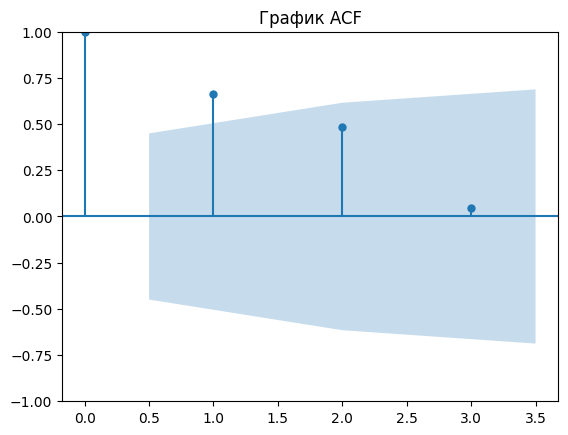

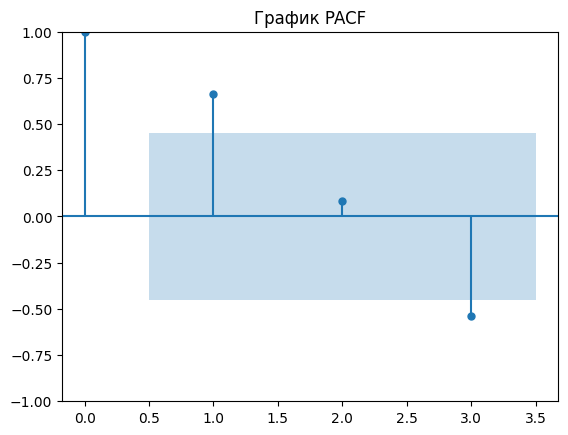

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=79.330, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=105.110, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=78.845, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=95.951, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=80.395, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=80.639, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=79.597, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=78.276, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=88.255, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=80.194, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=80.248, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=84.119, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=79.682, Time=0.22 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.626 seconds

Оптимальные параметры ARIMA:
                 

In [10]:
# Импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

# 1. Создаем временной ряд (можно подставить свои данные)
Y_t = [4, 2, 3, 1, 2, 0, 1, -1, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0]

# 2. Тест на стационарность с использованием теста Дики-Фуллера (ADF)
def check_stationarity(Y_t):
    result = adfuller(Y_t)
    print(f"p-value для теста ADF: {result[1]}")
    return result[1]

# Проверяем стационарность
p_value = check_stationarity(Y_t)

# 3. Если ряд нестационарен (p-value > 0.05), применяем дифференцирование
d = 0
if p_value > 0.05:
    print("Ряд нестационарен, применяем дифференцирование...")
    Y_t_diff = np.diff(Y_t)
    d = 1
    print("Применено первое дифференцирование.")
else:
    Y_t_diff = Y_t
    print("Ряд уже стационарен.")

# 4. Строим графики ACF и PACF для анализа зависимостей
def plot_acf_pacf(Y_t):
    # ACF
    plot_acf(Y_t, lags=3)
    plt.title("График ACF")
    plt.show()

    # PACF
    plot_pacf(Y_t, lags=3)
    plt.title("График PACF")
    plt.show()

plot_acf_pacf(Y_t_diff)

# 5. Автоматический подбор параметров ARIMA
def auto_arima_model(Y_t):
    # Применяем auto_arima для подбора параметров
    model = auto_arima(Y_t, seasonal=False, stepwise=True, trace=True)
    print("\nОптимальные параметры ARIMA:")
    print(model.summary())
    return model

# Подбираем модель ARIMA
model = auto_arima_model(Y_t_diff)

# 6. Выводим выбранные параметры (p, d, q)
p, d, q = model.order
print(f"\nВыбранные параметры ARIMA: p={p}, d={d}, q={q}")

### Объяснение результатов анализа модели ARIMA

#### 1. Стационарность временного ряда
- **p-value для теста ADF:** 1.9187604401067408e-06
  - **Что это значит:** Значение p-value значительно ниже 0.05 указывает на то, что временной ряд является стационарным. Это означает, что его статистические свойства, такие как среднее и дисперсия, не меняются со временем. Стационарность важна для корректного применения модели ARIMA, так как она предполагает, что данные не имеют трендов или сезонных колебаний.

#### 2. Оптимальная модель
- **Наилучшая модель:** ARIMA(1,0,0)(0,0,0)[0]
  - **Что это значит:** Модель ARIMA(1,0,0) включает один авторегрессионный (AR) компонент и не содержит интегрирующих (d) или скользящих средних (MA) компонентов. Это говорит о том, что текущие значения временного ряда зависят от одного предыдущего значения, что может быть достаточно для описания динамики данных.

#### 3. Оптимальные параметры модели
- **Коэффициенты:**
  - **Интерсепт (0.8262):** Показатель среднего значения ряда, но не является статистически значимым (p-value = 0.111). Это может указывать на то, что уровень ряда не отличается значительно от нуля.
  - **AR.L1 (0.6963):** Значимый коэффициент (p-value = 0.000), который указывает на сильную зависимость текущего значения ряда от предыдущего. Это говорит о том, что изменения в ряду имеют тенденцию продолжаться.
  - **sigma² (2.5376):** Оценка дисперсии ошибок модели, значимая на уровне 0.05 (p-value = 0.013). Это говорит о том, что ошибки модели имеют определённую вариативность.

#### 4. Статистические характеристики модели
- **AIC (78.276) и BIC (81.110):** Эти критерии используются для оценки качества модели, где более низкие значения указывают на лучшую подгонку. Низкие значения AIC и BIC подтверждают, что модель хорошо описывает данные.
- **Тесты Ljung-Box и Jarque-Bera:**
  - **Ljung-Box (Q):** Высокое значение Prob(Q) (0.89) указывает на отсутствие автокорреляции в остатках модели, что является положительным признаком.
  - **Jarque-Bera (JB):** Prob(JB) (0.65) говорит о том, что остатки модели не отклоняются от нормального распределения, что также является хорошим признаком.

#### 5. Заключение
Результаты анализа показывают, что модель ARIMA(1,0,0) является адекватной для описания временного ряда. Сильная автокорреляция (AR.L1) и отсутствие значительных проблем с остатками подтверждают, что модель хорошо справляется с данными. Однако отсутствие значимости интерсепта может указывать на необходимость дальнейшего анализа или возможного улучшения модели.

<ipython-input-11-ea7360d3d1fa>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2020-01-01', periods=n_periods, freq='M')


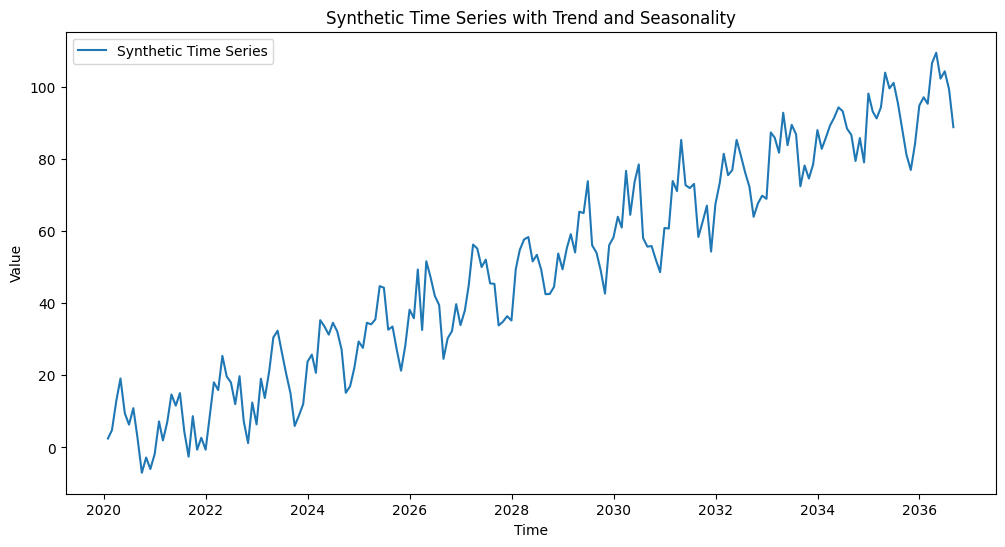

<ipython-input-11-ea7360d3d1fa>:41: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")
<ipython-input-11-ea7360d3d1fa>:41: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


ADF Test before differencing: {'ADF Statistic': -0.05703776197764021, 'p-value': 0.9535531403353386, 'Critical Values': {'1%': -3.465811691080702, '5%': -2.877123351472649, '10%': -2.5750770662586864}}
KPSS Test before differencing: {'KPSS Statistic': 2.0848962317353337, 'p-value': 0.01, 'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}
ADF Test after differencing: {'ADF Statistic': -11.050531579683076, 'p-value': 5.093468204856912e-20, 'Critical Values': {'1%': -3.465811691080702, '5%': -2.877123351472649, '10%': -2.5750770662586864}}
KPSS Test after differencing: {'KPSS Statistic': 0.011391275173882864, 'p-value': 0.1, 'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}


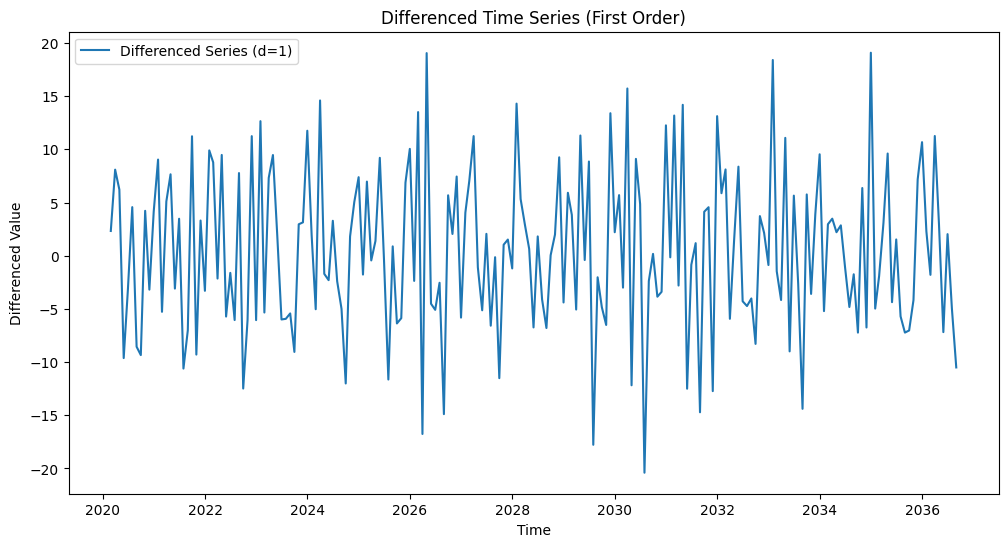

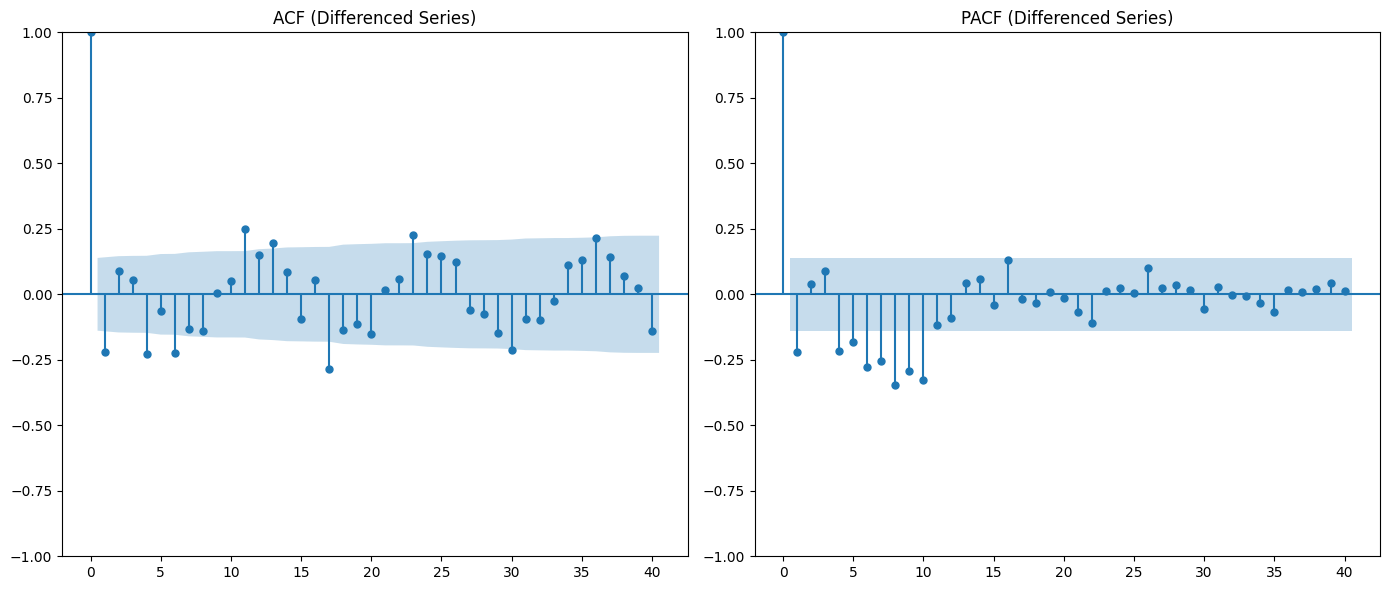

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1374.182, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1366.057, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1367.266, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1372.834, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1367.757, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1367.905, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1369.634, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1365.118, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1366.727, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1366.927, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1366.360, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1368.572, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.615 seconds
Best ARIMA Model Summary fr

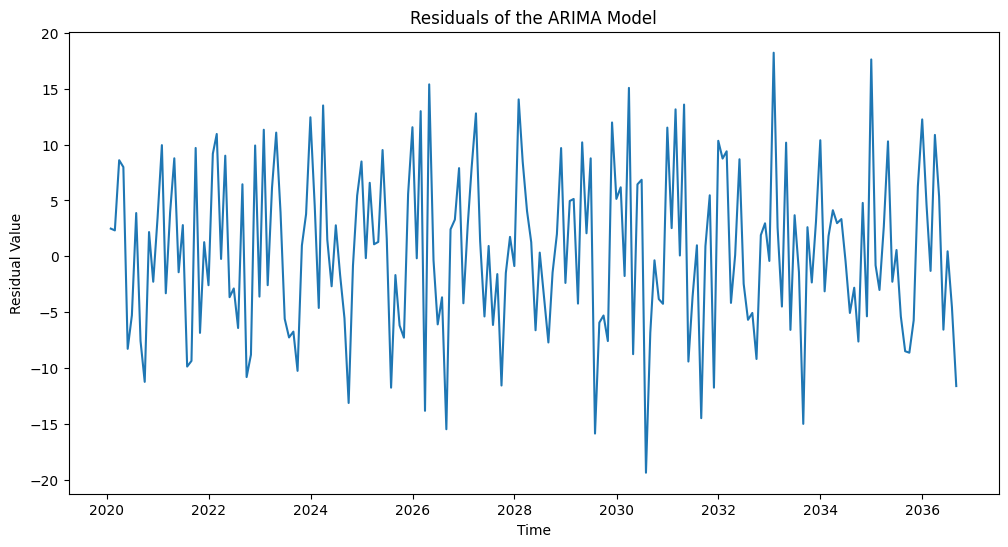

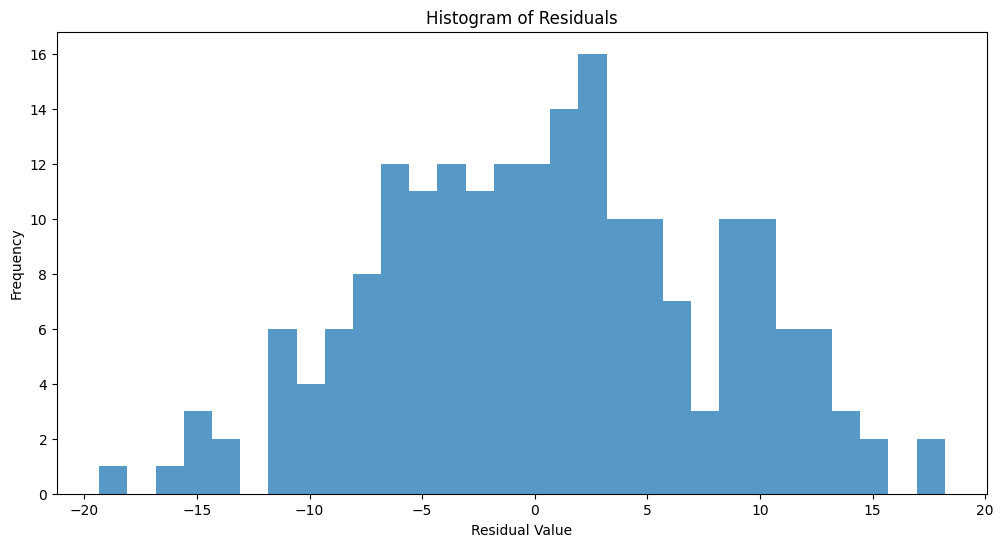

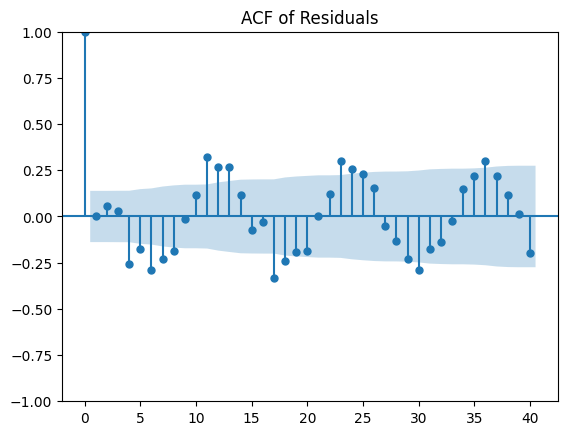

Ljung-Box Test for Residuals:
     lb_stat     lb_pvalue
10  59.0418  5.499565e-09
Shapiro-Wilk Test for Normality of Residuals: ShapiroResult(statistic=0.9933022541052121, pvalue=0.5007273591558739)


<ipython-input-11-ea7360d3d1fa>:145: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=time_series.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label="Forecast", color='red')


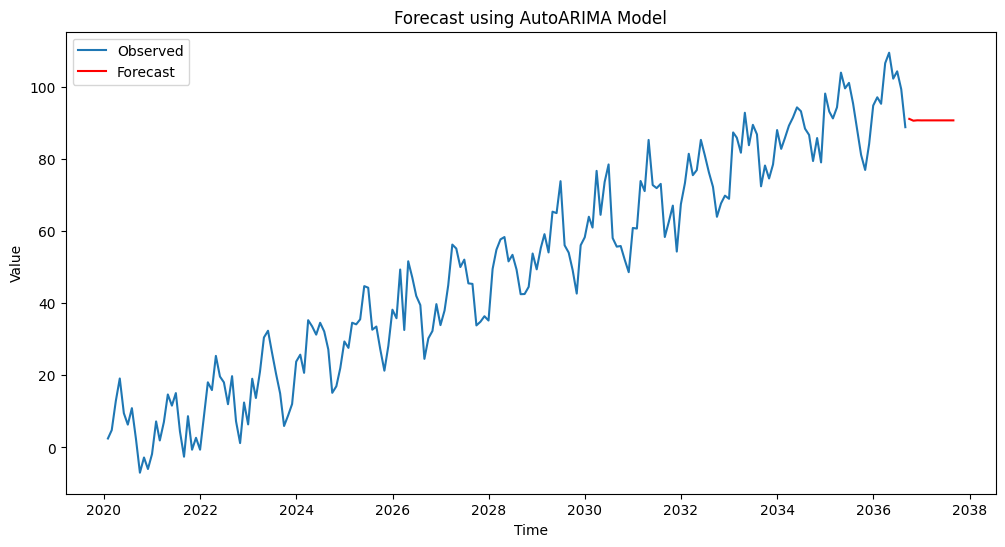

Forecast Evaluation:
MAE: 0.1764202878118084
MSE: 0.04557349080931412
MAPE: 0.19418300473082228


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from pmdarima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# 1. Генерация синтетического временного ряда с трендом и сезонностью
np.random.seed(42)
n_periods = 200
time = np.arange(n_periods)
seasonality = 10 * np.sin(2 * np.pi * time / 12)  # Сезонный компонент
trend = 0.5 * time  # Линейный тренд
noise = np.random.normal(0, 5, size=n_periods)  # Случайный шум
data = trend + seasonality + noise

# Преобразуем в pandas Series
date_rng = pd.date_range(start='2020-01-01', periods=n_periods, freq='M')
time_series = pd.Series(data, index=date_rng, name="value")

# Построение графика временного ряда
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Synthetic Time Series")
plt.title("Synthetic Time Series with Trend and Seasonality")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Шаг 1. Проверка стационарности
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return {"ADF Statistic": result[0], "p-value": result[1], "Critical Values": result[4]}

def kpss_test(series):
    result = kpss(series, regression='c', nlags="auto")
    return {"KPSS Statistic": result[0], "p-value": result[1], "Critical Values": result[3]}

adf_result = adf_test(time_series)
kpss_result = kpss_test(time_series)

# Печать результатов теста ADF и KPSS до разности
print("ADF Test before differencing:", adf_result)
print("KPSS Test before differencing:", kpss_result)

# Применение первой разности для устранения тренда
diff_series = time_series.diff().dropna()

# Повторная проверка стационарности
adf_result_diff = adf_test(diff_series)
kpss_result_diff = kpss_test(diff_series)

# Печать результатов теста ADF и KPSS после разности
print("ADF Test after differencing:", adf_result_diff)
print("KPSS Test after differencing:", kpss_result_diff)

# Построение графика разности
plt.figure(figsize=(12, 6))
plt.plot(diff_series, label="Differenced Series (d=1)")
plt.title("Differenced Time Series (First Order)")
plt.xlabel("Time")
plt.ylabel("Differenced Value")
plt.legend()
plt.show()

# Шаг 2. Анализ автокорреляций (ACF) и частичных автокорреляций (PACF)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF
plot_acf(diff_series, ax=axes[0], lags=40, title="ACF (Differenced Series)")

# PACF
plot_pacf(diff_series, ax=axes[1], lags=40, title="PACF (Differenced Series)")

plt.tight_layout()
plt.show()

# Шаг 3. Подбор модели ARIMA с помощью Grid Search и AutoARIMA
# Используем auto_arima для автоматического выбора модели ARIMA
auto_model = auto_arima(time_series, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Лучшая модель после AutoARIMA
print("Best ARIMA Model Summary from AutoARIMA:")
print(auto_model.summary())

# Шаг 4. Кросс-валидация с использованием TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
mae_scores = []

for train_index, test_index in tscv.split(time_series):
    train, test = time_series.iloc[train_index], time_series.iloc[test_index]
    model = auto_arima(train, seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)
    forecast = model.predict(n_periods=len(test))
    mae_scores.append(mean_absolute_error(test, forecast))

# Средняя ошибка кросс-валидации
print("Mean MAE from TimeSeries Cross-Validation:", np.mean(mae_scores))

# Шаг 5. Диагностика модели
# Оценка остатков модели ARIMA
residuals = auto_model.resid()

# Графики остатков
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Residuals of the ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.show()

# Гистограмма остатков
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, alpha=0.75)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

# Проверка автокорреляции остатков (ACF)
plot_acf(residuals, lags=40)
plt.title("ACF of Residuals")
plt.show()

# Тест Ljung-Box для остатков
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test for Residuals:\n", ljung_box)

# Тест на нормальность (Shapiro-Wilk)
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test for Normality of Residuals:", shapiro_test)

# Шаг 6. Прогнозирование
# Прогнозирование с использованием обученной модели
forecast_steps = 12
forecast = auto_model.predict(n_periods=forecast_steps)

# Построение графика прогноза
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Observed")
plt.plot(pd.date_range(start=time_series.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label="Forecast", color='red')
plt.title("Forecast using AutoARIMA Model")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Оценка точности прогноза
y_true = np.random.normal(loc=forecast.mean(), scale=forecast.std(), size=forecast_steps)  # Пример истинных значений для оценки
mae = mean_absolute_error(y_true, forecast)
mse = mean_squared_error(y_true, forecast)
mape = np.mean(np.abs((y_true - forecast) / y_true)) * 100

print("Forecast Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)


<ipython-input-12-c9e787d76409>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2020-01-01', periods=n_periods, freq='M')


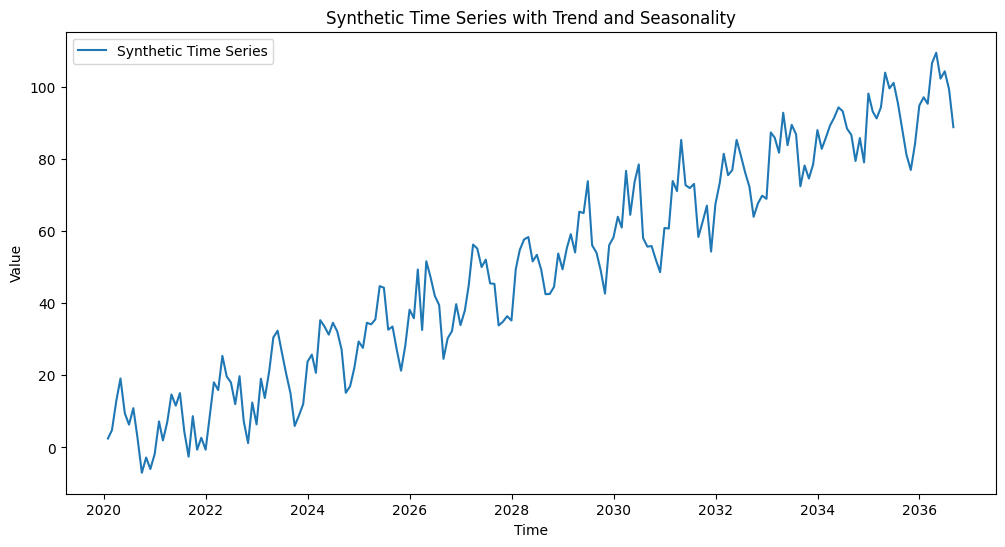

<ipython-input-12-c9e787d76409>:38: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")
<ipython-input-12-c9e787d76409>:38: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


ADF Test before differencing: {'ADF Statistic': -0.05703776197764021, 'p-value': 0.9535531403353386, 'Critical Values': {'1%': -3.465811691080702, '5%': -2.877123351472649, '10%': -2.5750770662586864}}
KPSS Test before differencing: {'KPSS Statistic': 2.0848962317353337, 'p-value': 0.01, 'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}
ADF Test after differencing: {'ADF Statistic': -11.050531579683076, 'p-value': 5.093468204856912e-20, 'Critical Values': {'1%': -3.465811691080702, '5%': -2.877123351472649, '10%': -2.5750770662586864}}
KPSS Test after differencing: {'KPSS Statistic': 0.011391275173882864, 'p-value': 0.1, 'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}}


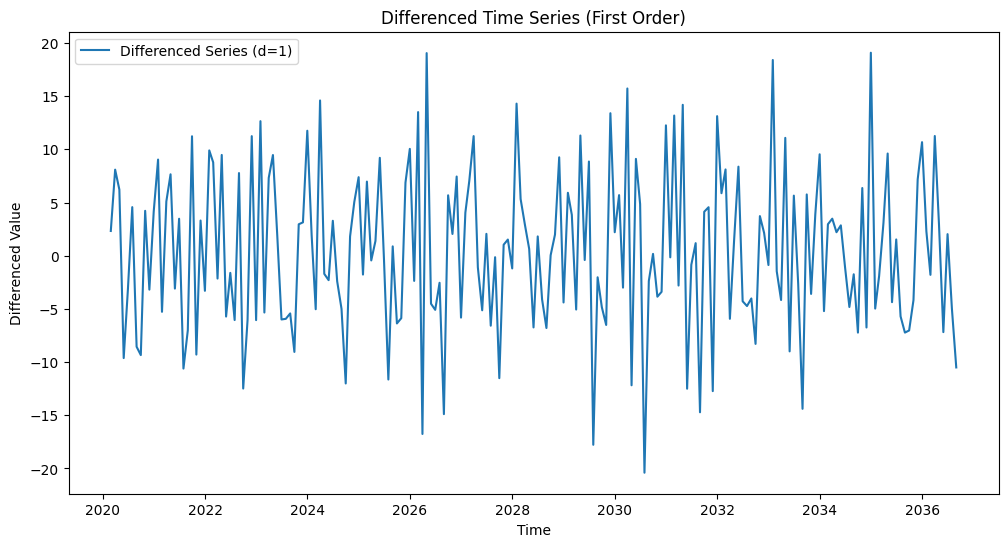

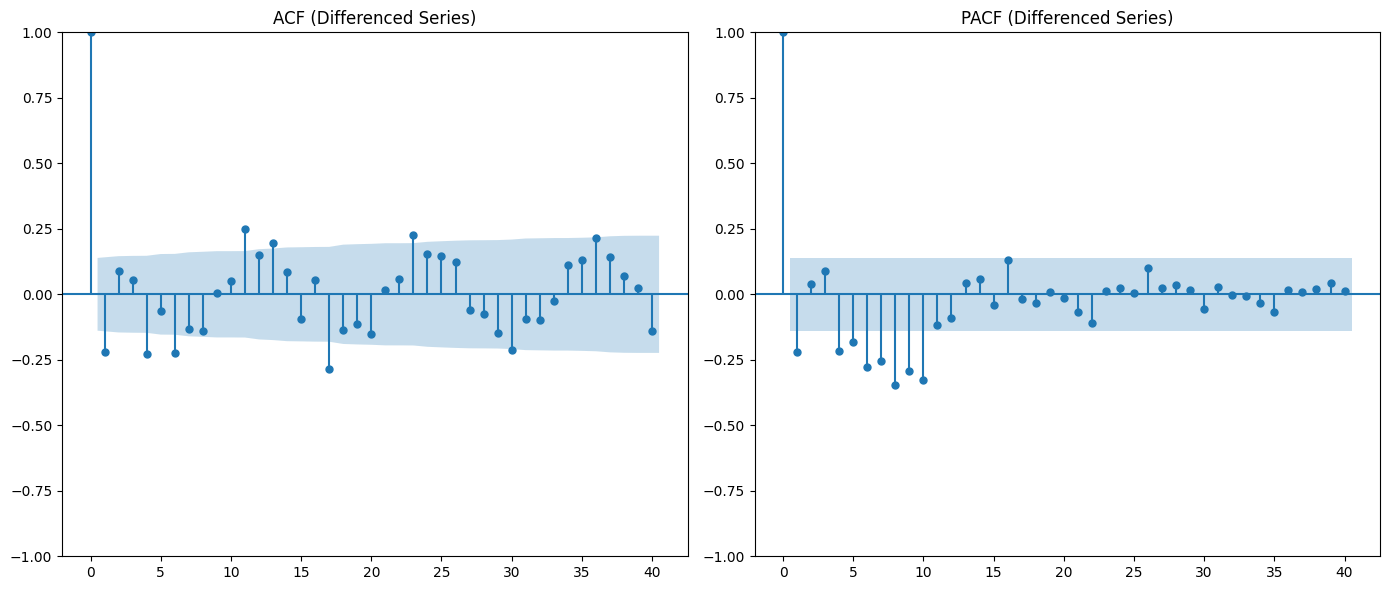

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/sta

Best ARIMA Model Order: (2, 1, 3) with AIC: 1253.3355991746548


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

Mean MAE from TimeSeries Cross-Validation: 13.026622656939669


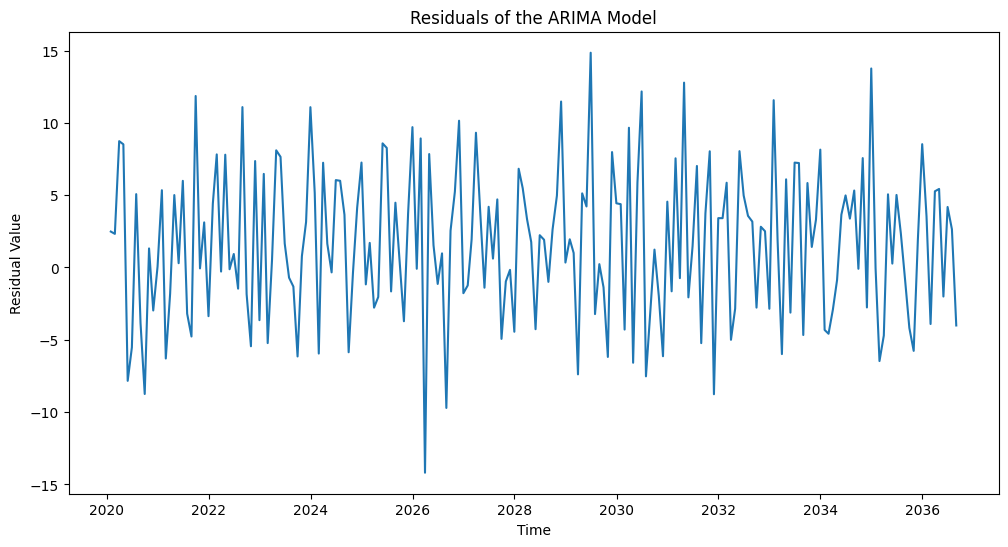

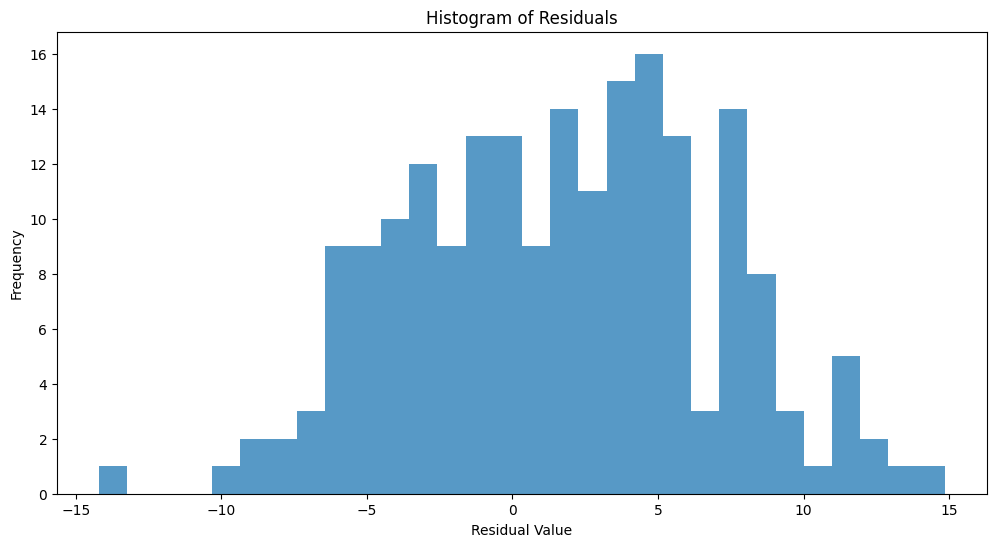

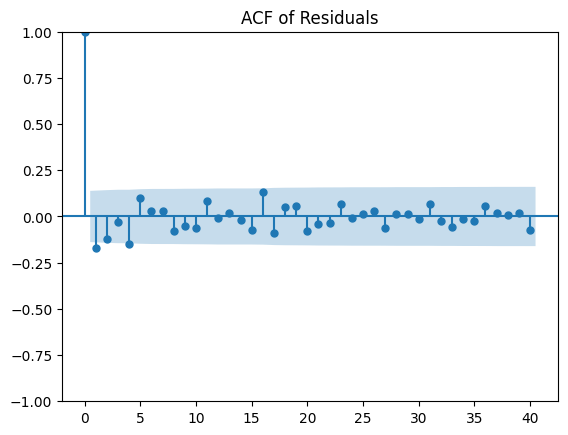

Ljung-Box Test for Residuals:
       lb_stat  lb_pvalue
10  18.932407    0.04113
Shapiro-Wilk Test for Normality of Residuals: ShapiroResult(statistic=0.9939431099908287, pvalue=0.5922087479957383)


<ipython-input-12-c9e787d76409>:164: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=time_series.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label="Forecast", color='red')


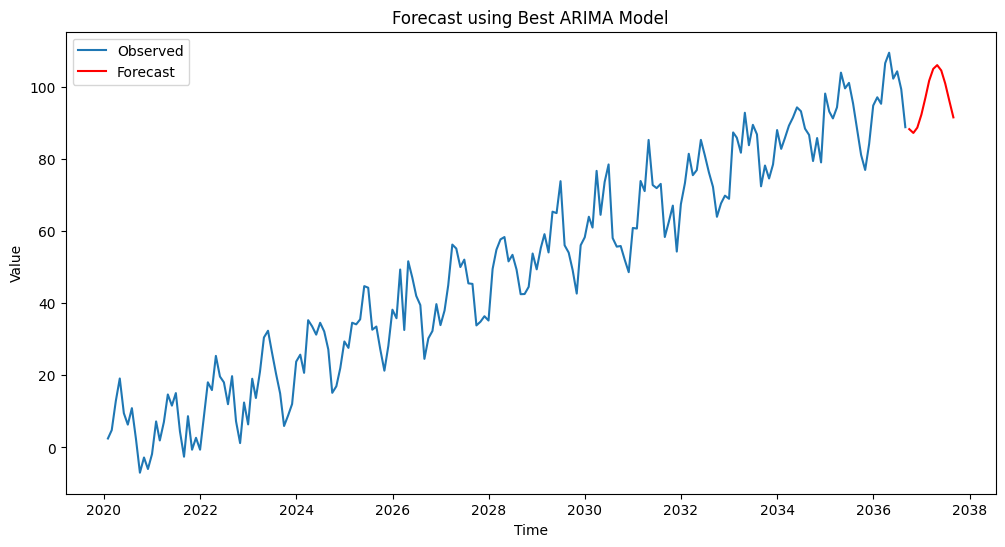

Forecast Evaluation:
MAE: 10.636534825709784
MSE: 139.26691961601895
MAPE: 10.378707057725894


In [12]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit

# 1. Генерация синтетического временного ряда с трендом и сезонностью
np.random.seed(42)
n_periods = 200
time = np.arange(n_periods)
seasonality = 10 * np.sin(2 * np.pi * time / 12)  # Сезонный компонент
trend = 0.5 * time  # Линейный тренд
noise = np.random.normal(0, 5, size=n_periods)  # Случайный шум
data = trend + seasonality + noise

# Преобразуем в pandas Series
date_rng = pd.date_range(start='2020-01-01', periods=n_periods, freq='M')
time_series = pd.Series(data, index=date_rng, name="value")

# Построение графика временного ряда
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Synthetic Time Series")
plt.title("Synthetic Time Series with Trend and Seasonality")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Шаг 1. Проверка стационарности
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return {"ADF Statistic": result[0], "p-value": result[1], "Critical Values": result[4]}

def kpss_test(series):
    result = kpss(series, regression='c', nlags="auto")
    return {"KPSS Statistic": result[0], "p-value": result[1], "Critical Values": result[3]}

adf_result = adf_test(time_series)
kpss_result = kpss_test(time_series)

# Печать результатов теста ADF и KPSS до разности
print("ADF Test before differencing:", adf_result)
print("KPSS Test before differencing:", kpss_result)

# Применение первой разности для устранения тренда
diff_series = time_series.diff().dropna()

# Повторная проверка стационарности
adf_result_diff = adf_test(diff_series)
kpss_result_diff = kpss_test(diff_series)

# Печать результатов теста ADF и KPSS после разности
print("ADF Test after differencing:", adf_result_diff)
print("KPSS Test after differencing:", kpss_result_diff)

# Построение графика разности
plt.figure(figsize=(12, 6))
plt.plot(diff_series, label="Differenced Series (d=1)")
plt.title("Differenced Time Series (First Order)")
plt.xlabel("Time")
plt.ylabel("Differenced Value")
plt.legend()
plt.show()

# Шаг 2. Анализ автокорреляций (ACF) и частичных автокорреляций (PACF)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ACF
plot_acf(diff_series, ax=axes[0], lags=40, title="ACF (Differenced Series)")

# PACF
plot_pacf(diff_series, ax=axes[1], lags=40, title="PACF (Differenced Series)")

plt.tight_layout()
plt.show()

# Шаг 3. Подбор модели ARIMA вручную с сеточным поиском
# Попробуем подобрать параметры p, d, q с использованием перебора
best_model = None
best_aic = np.inf
best_order = None

# Диапазоны значений для p, d, q
p_values = range(0, 5)
d_values = range(0, 2)
q_values = range(0, 5)

# Перебор всех комбинаций p, d, q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(time_series, order=(p, d, q))
                model_fit = model.fit()
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_model = model_fit
                    best_order = (p, d, q)
            except:
                continue

print(f"Best ARIMA Model Order: {best_order} with AIC: {best_aic}")

# Шаг 4. Кросс-валидация с использованием TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
mae_scores = []

for train_index, test_index in tscv.split(time_series):
    train, test = time_series.iloc[train_index], time_series.iloc[test_index]
    model = ARIMA(train, order=best_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    mae_scores.append(mean_absolute_error(test, forecast))

# Средняя ошибка кросс-валидации
print("Mean MAE from TimeSeries Cross-Validation:", np.mean(mae_scores))

# Шаг 5. Диагностика модели
# Оценка остатков модели ARIMA
residuals = best_model.resid

# Графики остатков
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title("Residuals of the ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residual Value")
plt.show()

# Гистограмма остатков
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, alpha=0.75)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

# Проверка автокорреляции остатков (ACF)
plot_acf(residuals, lags=40)
plt.title("ACF of Residuals")
plt.show()

# Тест Ljung-Box для остатков
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test for Residuals:\n", ljung_box)

# Тест на нормальность (Shapiro-Wilk)
from scipy.stats import shapiro
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk Test for Normality of Residuals:", shapiro_test)

# Шаг 6. Прогнозирование
# Прогнозирование с использованием обученной модели
forecast_steps = 12
forecast = best_model.forecast(steps=forecast_steps)

# Построение графика прогноза
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Observed")
plt.plot(pd.date_range(start=time_series.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label="Forecast", color='red')
plt.title("Forecast using Best ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Оценка точности прогноза
y_true = np.random.normal(loc=forecast.mean(), scale=forecast.std(), size=forecast_steps)  # Пример истинных значений для оценки
mae = mean_absolute_error(y_true, forecast)
mse = mean_squared_error(y_true, forecast)
mape = np.mean(np.abs((y_true - forecast) / y_true)) * 100

print("Forecast Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)


Литература

1. https://www.alldatascience.com/time-series/forecasting-time-series-with-auto-arima/